Project 4 

In [3170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3171]:
data = pd.read_csv('../data/raw/emdat_extreme_temperature_deaths_2000_2025.csv')
data.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,Country,Subregion,Region,Location,Origin,Associated Types,OFDA/BHA Response,Appeal,Declaration,AID Contribution ('000 US$),Magnitude,Magnitude Scale,Latitude,Longitude,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2000-0003-BGD,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,BGD,Bangladesh,Southern Asia,Asia,"Barisal, Chittagong, Dhaka, Khulna, Rajshahi, ...",NaN,NaN,No,No,No,NaN,6.40,°C,NaN,NaN,NaN,2000,1,NaN,2000,1.00,NaN,49.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.90,"[{""adm1_code"":575,""adm1_name"":""Barisal""},{""adm...",2003-07-01,2023-09-25
1,2000-0020-IND,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,IND,India,Southern Asia,Asia,"Bihar, Uttar Pradesh, West Bengal provinces",NaN,NaN,No,No,No,NaN,NaN,°C,NaN,NaN,NaN,2000,1,NaN,2000,1.00,NaN,275.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.90,"[{""adm1_code"":1511,""adm1_name"":""West Bengal""},...",2003-07-01,2023-09-25
2,2000-0029-BGR,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,BGR,Bulgaria,Eastern Europe,Europe,"Sofia province, Sofia-city province",NaN,NaN,No,No,No,NaN,NaN,°C,NaN,NaN,NaN,2000,1,NaN,2000,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.90,"[{""adm1_code"":722,""adm1_name"":""Sofia""},{""adm1_...",2003-07-01,2023-09-25
3,2000-0092-EGY,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,EGY,Egypt,Northern Africa,Africa,"Kalyoubia, Shrkia, Fayoum province",NaN,NaN,No,No,No,NaN,2.00,°C,NaN,NaN,NaN,2000,1,NaN,2000,1.00,NaN,3.00,105.00,NaN,NaN,105.00,NaN,NaN,NaN,NaN,NaN,NaN,54.90,"[{""adm1_code"":61518,""adm1_name"":""Fayoum""},{""ad...",2003-07-01,2023-09-25
4,2000-0165-RUS,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,RUS,Russian Federation,Eastern Europe,Europe,Moskva province,NaN,NaN,No,No,No,NaN,NaN,°C,NaN,NaN,NaN,2000,2,NaN,2000,2.00,NaN,13.00,252.00,NaN,NaN,252.00,NaN,NaN,NaN,NaN,NaN,NaN,54.90,"[{""adm1_code"":2535,""adm1_name"":""Moskva""}]",2003-07-01,2023-09-25


In [3172]:
import numpy as np
import pandas as pd

cols = [
    'Start Year','End Year','Start Month','End Month','Start Day','End Day',
    'Disaster Subtype','Magnitude','ISO','Country','Location','Total Deaths'
]
data = data[cols]

# Calculate months duration correctly across years
data['Months_Duration'] = (
    (data['End Year'].fillna(data['Start Year']) - data['Start Year'].fillna(data['End Year'])) * 12 +
    (data['End Month'].fillna(data['Start Month']) - data['Start Month'].fillna(data['End Month'])) + 1
)

# Set to NaN if any relevant field is missing
data['Months_Duration'] = np.where(
    data[['Start Year', 'End Year', 'Start Month', 'End Month']].isnull().any(axis=1),
    np.nan,
    data['Months_Duration']
)

# Calculate days duration: if event ends in next month, add days from start to month-end + days in next month
def calc_days_duration(row):
    start = row['Start Day']
    end = row['End Day']
    if pd.isna(start) or pd.isna(end):
        return np.nan
    if end >= start:
        return end - start + 1
    else:
        return (30 - start + 1) + end  # event spills to next month

data['Days_Duration'] = data.apply(calc_days_duration, axis=1)

# Display final columns in preferred order
data = data[
    ['Start Year','End Year','Disaster Subtype','Magnitude','ISO','Country','Location','Total Deaths',
     'Start Month', 'End Month', 'Months_Duration', 'Start Day', 'End Day', 'Days_Duration']
]

data.head()


,Start Year,End Year,Disaster Subtype,Magnitude,ISO,Country,Location,Total Deaths,Start Month,End Month,Months_Duration,Start Day,End Day,Days_Duration
0,2000,2000,Cold wave,6.40,BGD,Bangladesh,"Barisal, Chittagong, Dhaka, Khulna, Rajshahi, ...",49.00,1,1.00,1.00,NaN,NaN,NaN
1,2000,2000,Cold wave,NaN,IND,India,"Bihar, Uttar Pradesh, West Bengal provinces",275.00,1,1.00,1.00,NaN,NaN,NaN
2,2000,2000,Cold wave,NaN,BGR,Bulgaria,"Sofia province, Sofia-city province",NaN,1,1.00,1.00,NaN,NaN,NaN
3,2000,2000,Cold wave,2.00,EGY,Egypt,"Kalyoubia, Shrkia, Fayoum province",3.00,1,1.00,1.00,NaN,NaN,NaN
4,2000,2000,Cold wave,NaN,RUS,Russian Federation,Moskva province,13.00,2,2.00,1.00,NaN,NaN,NaN


In [3173]:
data.shape

(535, 14)

In [3174]:
data = data[data['Start Year'].between(2000, 2024)]
data.head()

,Start Year,End Year,Disaster Subtype,Magnitude,ISO,Country,Location,Total Deaths,Start Month,End Month,Months_Duration,Start Day,End Day,Days_Duration
0,2000,2000,Cold wave,6.40,BGD,Bangladesh,"Barisal, Chittagong, Dhaka, Khulna, Rajshahi, ...",49.00,1,1.00,1.00,NaN,NaN,NaN
1,2000,2000,Cold wave,NaN,IND,India,"Bihar, Uttar Pradesh, West Bengal provinces",275.00,1,1.00,1.00,NaN,NaN,NaN
2,2000,2000,Cold wave,NaN,BGR,Bulgaria,"Sofia province, Sofia-city province",NaN,1,1.00,1.00,NaN,NaN,NaN
3,2000,2000,Cold wave,2.00,EGY,Egypt,"Kalyoubia, Shrkia, Fayoum province",3.00,1,1.00,1.00,NaN,NaN,NaN
4,2000,2000,Cold wave,NaN,RUS,Russian Federation,Moskva province,13.00,2,2.00,1.00,NaN,NaN,NaN


In [3175]:
data.shape

(535, 14)

In [3176]:
data.isnull().sum().sort_values(ascending=False)

Days_Duration       264
End Day             257
Start Day           239
Magnitude           238
Location            109
Total Deaths         91
End Month             1
Months_Duration       1
Start Year            0
End Year              0
Disaster Subtype      0
ISO                   0
Country               0
Start Month           0
dtype: int64

In [3177]:
data['Disaster Subtype'].value_counts(normalize=True)

Disaster Subtype
Heat wave                  0.45
Cold wave                  0.40
Severe winter conditions   0.14
Name: proportion, dtype: float64

In [3178]:
data.columns

Index(['Start Year', 'End Year', 'Disaster Subtype', 'Magnitude', 'ISO',
       'Country', 'Location', 'Total Deaths', 'Start Month', 'End Month',
       'Months_Duration', 'Start Day', 'End Day', 'Days_Duration'],
      dtype='object')

In [3179]:
features = ['DisNo.', 'Disaster Subtype',
       'Event Name', 'ISO', 'Country', 'Subregion', 'Region','Location',  'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', "AID Contribution ('000 US$)", 'Magnitude',
       'Magnitude Scale', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', "Total Damage ('000 US$)", "Total Damage, Adjusted ('000 US$)", 'CPI',
       'Admin Units', 'Entry Date', 'Last Update']

In [3180]:
deaths = pd.read_csv('../data/raw/number-of-deaths-per-year.csv')
deaths['deaths'] = deaths['Deaths - Sex: all - Age: all - Variant: estimates'].fillna(
    deaths['Deaths - Sex: all - Age: all - Variant: medium']
)
deaths = deaths.drop([
    'Deaths - Sex: all - Age: all - Variant: estimates',
    'Deaths - Sex: all - Age: all - Variant: medium'
], axis=1)
deaths.head(5)

,Entity,Code,Year,deaths
0,Afghanistan,AFG,1950,290972.00
1,Afghanistan,AFG,1951,288752.00
2,Afghanistan,AFG,1952,288059.00
3,Afghanistan,AFG,1953,287712.00
4,Afghanistan,AFG,1954,289189.00


In [3181]:
deaths = deaths[deaths['Year'].between(2000, 2024)]
#deaths = deaths.drop(columns= 'Code')
deaths.head()

,Entity,Code,Year,deaths
50,Afghanistan,AFG,2000,253804.00
51,Afghanistan,AFG,2001,242473.00
52,Afghanistan,AFG,2002,239161.00
53,Afghanistan,AFG,2003,243573.00
54,Afghanistan,AFG,2004,244435.00


In [3182]:
population = pd.read_csv('../data/raw/population.csv',header=1)
population.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.00,55578.00,56320.00,57002.00,57619.00,58190.00,58694.00,58990.00,59069.00,59052.00,58950.00,58781.00,58047.00,58299.00,58349.00,58295.00,58368.00,58580.00,58776.00,59191.00,59909.00,60563.00,61276.00,62228.00,62901.00,61728.00,59931.00,59159.00,59331.00,60443.00,62753.00,65896.00,69005.00,73685.00,77595.00,79805.00,83021.00,86301.00,88451.00,89659.00,90588.00,91439.00,92074.00,93128.00,95138.00,97635.00,99405.00,100150.00,100917.00,101604.00,101838.00,102591.00,104110.00,105675.00,106807.00,107906.00,108727.00,108735.00,108908.00,109203.00,108587.00,107700.00,107310.00,107359.00,107624.00,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.00,133534923.00,137171659.00,140945536.00,144904094.00,149033472.00,153281203.00,157704381.00,162329396.00,167088245.00,171984985.00,177022314.00,182126556.00,187524135.00,193186642.00,198914573.00,204802976.00,210680842.00,217074286.00,223974122.00,230792729.00,238043099.00,245822010.00,253644643.00,261458202.00,269450407.00,277621771.00,286067346.00,294498625.00,302939121.00,311748681.00,320442961.00,329082707.00,338324002.00,347441809.00,356580375.00,366138524.00,375646235.00,385505757.00,395750933.00,406156661.00,416807868.00,427820358.00,439173286.00,450928044.00,463076637.00,475606210.00,488580707.00,502070763.00,516003448.00,530308387.00,544737983.00,559609961.00,575202699.00,590968990.00,607123269.00,623369401.00,640058741.00,657801085.00,675950189.00,694446100.00,713090928.00,731821393.00,750503764.00,769294618.00,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.00,9214083.00,9404406.00,9604487.00,9814318.00,10036008.00,10266395.00,10505959.00,10756922.00,11017409.00,11290128.00,11567667.00,11853696.00,12157999.00,12469127.00,12773954.00,13059851.00,13340756.00,13611441.00,13655567.00,13169311.00,11937581.00,10991378.00,10917982.00,11190221.00,11426852.00,11420074.00,11387818.00,11523298.00,11874088.00,12045660.00,12238879.00,13278974.00,14943172.00,16250794.00,17065836.00,17763266.00,18452091.00,19159996.00,19887785.00,20130327.00,20284307.00,21378117.00,22733049.00,23560654.00,24404567.00,25424094.00,25909852.00,26482622.00,27466101.00,28284089.00,29347708.00,30560034.00,31622704.00,32792523.00,33831764.00,34700612.00,35688935.00,36743039.00,37856121.00,39068979.00,40000412.00,40578842.00,41454761.00,42647492.00,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.00,99706674.00,101854756.00,104089175.00,106388440.00,108772632.00,111246953.00,113795019.00,116444636.00,119203521.00,122086536.00,125072948.00,128176494.00,131449942.00,134911581.00,138569918.00,142337272.00,146258576.00,150402616.00,154721711.00,159166518.00,163762473.00,168585118.00,173255157.00,177880746.00,182811038.00,187889141.00,193104347.00,198485027.00,204062274.00,209566031.00,215178709.00,221191375.00,227246778.00,233360104.00,239801875.00,246415446.00,253207584.00,260297834.00,267506298.00,274968446.00,282780717.00,290841795.00,299142845.00,307725100.00,316588476.00,325663158.00,334984176.00,344586109.00,354343844.00,364358270.00,374790143.00,385360349.00,396030207.00,406992047.00,418127845.00,429454743.00,440882906.00,452195915.00,463365429.00,474569351.00,485920997.00,497387180.00,509398589.00,521764076.00,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.00,5301583.00,5354310.00,5408320.00,5464187.00,5521981.00,5581386.00,5641807.00,5702699.00,5763685.00,5852788.00,5991102.00,6174262.00,6388528.00,6613367.00,6842947.00,7074664.00,7317829.00,7576734.00,7847207.00,8133872.00,8435607.00,8751648.00,9

In [3183]:
#cols = ['Country Name','Country Code', '2020', '2021', '2022', '2023', '2024']
#population = population[cols]
#population.head()

In [3184]:
print(deaths.columns)


Index(['Entity', 'Code', 'Year', 'deaths'], dtype='object')


In [3185]:
#deaths = deaths.rename(columns={'Code': 'ISO'})
#population = population.rename(columns={'Country Code': 'ISO'})

#population = population.melt(
    #id_vars=['Country Name', 'ISO'],
    #value_vars=['2020', '2021', '2022', '2023', '2024'],
    #var_name='Year',
    #value_name='Population'
#)
#population['Year'] = population['Year'].astype(int)
#population.head()

In [3186]:
deaths = deaths.rename(columns={'Code': 'ISO'})
population = population.rename(columns={'Country Code': 'ISO'})

# Create year columns from 2000 to 2024
year_cols = [str(y) for y in range(2000, 2024)]

# Melt using the dynamic list
population = population.melt(
    id_vars=['Country Name', 'ISO'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Population'
)

# Convert Year to integer
population['Year'] = population['Year'].astype(int)

population.head()


,Country Name,ISO,Year,Population
0,Aruba,ABW,2000,90588.00
1,Africa Eastern and Southern,AFE,2000,406156661.00
2,Afghanistan,AFG,2000,20130327.00
3,Africa Western and Central,AFW,2000,274968446.00
4,Angola,AGO,2000,16194869.00


In [3187]:
data['Year'] = data['Start Year'].astype(int)
merged = pd.merge(
    data,
    deaths[['ISO', 'Year', 'deaths']],
    on=['ISO', 'Year'],
    how='left'
)
merged.shape

(535, 16)

In [3188]:
final = pd.merge(
    merged,
    population[['ISO', 'Year', 'Population']],
    on=['ISO', 'Year'],
    how='left'
)
final.head()

/Users/kenmwaniki/Library/Python/3.12/lib/python/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,Start Year,End Year,Disaster Subtype,Magnitude,ISO,Country,Location,Total Deaths,Start Month,End Month,Months_Duration,Start Day,End Day,Days_Duration,Year,deaths,Population
0,2000,2000,Cold wave,6.40,BGD,Bangladesh,"Barisal, Chittagong, Dhaka, Khulna, Rajshahi, ...",49.00,1,1.00,1.00,NaN,NaN,NaN,2000,1113445.00,134544304.00
1,2000,2000,Cold wave,NaN,IND,India,"Bihar, Uttar Pradesh, West Bengal provinces",275.00,1,1.00,1.00,NaN,NaN,NaN,2000,9127431.00,1057922733.00
2,2000,2000,Cold wave,NaN,BGR,Bulgaria,"Sofia province, Sofia-city province",NaN,1,1.00,1.00,NaN,NaN,NaN,2000,115129.00,8170172.00
3,2000,2000,Cold wave,2.00,EGY,Egypt,"Kalyoubia, Shrkia, Fayoum province",3.00,1,1.00,1.00,NaN,NaN,NaN,2000,461788.00,73083284.00
4,2000,2000,Cold wave,NaN,RUS,Russian Federation,Moskva province,13.00,2,2.00,1.00,NaN,NaN,NaN,2000,2286159.00,146596869.00


In [3189]:
final['deaths'].isnull().sum()


np.int64(3)

In [3190]:
final.shape

(535, 17)

In [3191]:
pd.set_option('display.float_format', '{:.6f}'.format)
# For each row, calculate heat and cold deaths
final['Total_Heat_Deaths'] = final.apply(
    lambda row: row['Total Deaths'] if 'heat' in str(row['Disaster Subtype']).lower() else 0, axis=1
)
final['Total_Cold_Deaths'] = final.apply(
    lambda row: row['Total Deaths'] if 'cold' in str(row['Disaster Subtype']).lower() else 0, axis=1
)

# Rename deaths
final = final.rename(columns={'deaths': 'Total_Deaths'})

# Calculate percentage columns
final['Percentage_Heat_Deaths'] = 100 * final['Total_Heat_Deaths'] / final['Total_Deaths']
final['Percentage_Cold_Deaths'] = 100 * final['Total_Cold_Deaths'] / final['Total_Deaths']

# Clean up for NaN/infinite values (from division by zero or NaN deaths)
final['Percentage_Heat_Deaths'] = final['Percentage_Heat_Deaths'].replace([np.inf, -np.inf], 0).fillna(0)
final['Percentage_Cold_Deaths'] = final['Percentage_Cold_Deaths'].replace([np.inf, -np.inf], 0).fillna(0)

# Order columns
summary = final[
    [
        'Country', 'ISO', 'Year', 'Population', 'Magnitude',
        'Total_Heat_Deaths', 'Percentage_Heat_Deaths',
        'Total_Cold_Deaths', 'Percentage_Cold_Deaths',
        'Total_Deaths', 'Start Month', 'End Month', 'Months_Duration',
        'Start Day', 'End Day', 'Days_Duration'
    ]
]

summary.head()


,Country,ISO,Year,Population,Magnitude,Total_Heat_Deaths,Percentage_Heat_Deaths,Total_Cold_Deaths,Percentage_Cold_Deaths,Total_Deaths,Start Month,End Month,Months_Duration,Start Day,End Day,Days_Duration
0,Bangladesh,BGD,2000,134544304.000000,6.400000,0.000000,0.000000,49.000000,0.004401,1113445.000000,1,1.000000,1.000000,NaN,NaN,NaN
1,India,IND,2000,1057922733.000000,NaN,0.000000,0.000000,275.000000,0.003013,9127431.000000,1,1.000000,1.000000,NaN,NaN,NaN
2,Bulgaria,BGR,2000,8170172.000000,NaN,0.000000,0.000000,NaN,0.000000,115129.000000,1,1.000000,1.000000,NaN,NaN,NaN
3,Egypt,EGY,2000,73083284.000000,2.000000,0.000000,0.000000,3.000000,0.000650,461788.000000,1,1.000000,1.000000,NaN,NaN,NaN
4,Russian Federation,RUS,2000,146596869.000000,NaN,0.000000,0.000000,13.000000,0.000569,2286159.000000,2,2.000000,1.000000,NaN,NaN,NaN


In [3192]:

#final = final.groupby(['Country', 'ISO', 'Year', 'Population','Magnitude', 'deaths','Start Month','End Month','Months_Duration','Start Day','End Day','Days_Duration'], as_index=False).agg(
    #Total_Heat_Deaths = ('Total Deaths', lambda x: x[final.loc[x.index, 'Disaster Subtype'].str.contains('Heat', case=False, na=False)].sum()),
    #Total_Cold_Deaths = ('Total Deaths', lambda x: x[final.loc[x.index, 'Disaster Subtype'].str.contains('Cold', case=False, na=False)].sum()),
#)


#final = final.rename(columns={'deaths': 'Total_Deaths'})

# Percentage columns
#final['Percentage_Heat_Deaths'] = 100 * final['Total_Heat_Deaths'] / final['Total_Deaths']
#final['Percentage_Cold_Deaths'] = 100 * final['Total_Cold_Deaths'] / final['Total_Deaths']

# Order columns
#summary = final[[
    #'Country', 'ISO', 'Year', 'Population','Magnitude',
    #'Total_Heat_Deaths', 'Percentage_Heat_Deaths',
    #'Total_Cold_Deaths', 'Percentage_Cold_Deaths',
    #'Total_Deaths','Start Month','End Month','Months_Duration','Start Day','End Day','Days_Duration'
#]]
#summary


In [3193]:
summary.shape

(535, 16)

In [3194]:
summary.to_csv('../data/raw/Heat_cold_deathsBy_Population.csv')

In [3195]:
colddata = pd.read_csv('../data/cold_final_dataset.csv')
colddata.head()

,Unnamed: 0,country,subregion,region,location,temperature,start_year,start_month,total_deaths,start_date,end_date,duration_days,duration,latitude,longitude,delta_temp_C,delta_temp_std
0,0,Afghanistan,Southern Asia,Asia,"Hirat, Faryab, Jawzjan, Balkh, Samangan, Sar-e...",-25.000000,2001,1,150.000000,2001-01-31,2001-02-20,20 days,20,30,70,-24.856821,-8.561158
1,1,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.000000,2001,10,270.000000,2001-10-10,2002-01-20,102 days,102,50,20,-15.941674,-4.306348
2,2,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.000000,2001,10,270.000000,2001-10-10,2002-01-20,102 days,102,50,20,-15.941674,-4.306348
3,3,Peru,Latin America and the Caribbean,Americas,"Ayacucho, Huancavelica, Tacna, Moquegua, Arequ...",-28.000000,2003,7,339.000000,2003-07-07,2003-08-15,39 days,39,-10,-70,-43.303703,-20.441972
4,4,South Africa,Sub-Saharan Africa,Africa,"Gauteng, Eastern Cape provinces",0.000000,2007,5,22.000000,2007-05-21,2007-05-27,6 days,6,-30,30,-1.690848,-0.672643


In [3196]:
heatdata = pd.read_csv('../data/Hot_final_dataset.csv')
heatdata.head()

,Unnamed: 0,country,subregion,region,location,temperature,start_year,start_month,total_deaths,start_date,end_date,duration_days,duration,latitude,longitude,delta_temp_C,delta_temp_std
0,0,India,Southern Asia,Asia,"Madhya Pradesh, Andhra Pradesh, Uttar Pradesh,...",50.000000,2002,5,1030.000000,2002-05-10,2002-05-22,12 days,12,20.000000,80.000000,26.641818,13.398198
1,1,Bangladesh,Southern Asia,Asia,"Dhaka, Khulna, Rajshahi provinces",40.000000,2003,5,62.000000,2003-05-10,2003-06-12,33 days,33,30.000000,90.000000,55.978310,16.904774
2,2,India,Southern Asia,Asia,"Andhra Pradesh, Orissa, Tamil Nadu, Vidarbha (...",49.000000,2003,5,1210.000000,2003-05-14,2003-06-06,23 days,23,20.000000,80.000000,26.180573,12.736790
3,3,Pakistan,Southern Asia,Asia,Punjab province,50.000000,2003,5,200.000000,2003-05-01,2003-06-06,36 days,36,30.000000,70.000000,36.546045,13.309940
4,4,Czechia,Eastern Europe,Europe,"Jihocesky, Jihomoravsky, Praha, Severocesky, S...",25.000000,2003,7,418.000000,2003-07-19,2003-07-22,3 days,3,50.000000,20.000000,15.662070,6.781608


In [3197]:
colddata['event_type'] = 'cold'
heatdata['event_type'] = 'heat'
data = pd.concat([colddata, heatdata], ignore_index=True)
data = data.drop(columns=['Unnamed: 0'])
data.head()

,country,subregion,region,location,temperature,start_year,start_month,total_deaths,start_date,end_date,duration_days,duration,latitude,longitude,delta_temp_C,delta_temp_std,event_type
0,Afghanistan,Southern Asia,Asia,"Hirat, Faryab, Jawzjan, Balkh, Samangan, Sar-e...",-25.000000,2001,1,150.000000,2001-01-31,2001-02-20,20 days,20,30.000000,70.000000,-24.856821,-8.561158,cold
1,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.000000,2001,10,270.000000,2001-10-10,2002-01-20,102 days,102,50.000000,20.000000,-15.941674,-4.306348,cold
2,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.000000,2001,10,270.000000,2001-10-10,2002-01-20,102 days,102,50.000000,20.000000,-15.941674,-4.306348,cold
3,Peru,Latin America and the Caribbean,Americas,"Ayacucho, Huancavelica, Tacna, Moquegua, Arequ...",-28.000000,2003,7,339.000000,2003-07-07,2003-08-15,39 days,39,-10.000000,-70.000000,-43.303703,-20.441972,cold
4,South Africa,Sub-Saharan Africa,Africa,"Gauteng, Eastern Cape provinces",0.000000,2007,5,22.000000,2007-05-21,2007-05-27,6 days,6,-30.000000,30.000000,-1.690848,-0.672643,cold


In [3198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         105 non-null    object 
 1   subregion       105 non-null    object 
 2   region          105 non-null    object 
 3   location        78 non-null     object 
 4   temperature     105 non-null    float64
 5   start_year      105 non-null    int64  
 6   start_month     105 non-null    int64  
 7   total_deaths    105 non-null    float64
 8   start_date      105 non-null    object 
 9   end_date        105 non-null    object 
 10  duration_days   105 non-null    object 
 11  duration        105 non-null    int64  
 12  latitude        102 non-null    float64
 13  longitude       102 non-null    float64
 14  delta_temp_C    105 non-null    float64
 15  delta_temp_std  105 non-null    float64
 16  event_type      105 non-null    object 
dtypes: float64(6), int64(3), object(8)


In [3199]:
data.isnull().sum()

country            0
subregion          0
region             0
location          27
temperature        0
start_year         0
start_month        0
total_deaths       0
start_date         0
end_date           0
duration_days      0
duration           0
latitude           3
longitude          3
delta_temp_C       0
delta_temp_std     0
event_type         0
dtype: int64

In [3200]:
data['duration_days'] = data['duration_days'].str.extract('(\d+)').astype(int)
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/var/folders/z0/4lpm_z051kx3_j41lk3xxj280000gn/T/ipykernel_2428/442246062.py:1: SyntaxWarning: invalid escape sequence '\d'
  data['duration_days'] = data['duration_days'].str.extract('(\d+)').astype(int)


,country,subregion,region,location,temperature,start_year,start_month,total_deaths,start_date,end_date,duration_days,duration,latitude,longitude,delta_temp_C,delta_temp_std,event_type
0,Afghanistan,Southern Asia,Asia,"Hirat, Faryab, Jawzjan, Balkh, Samangan, Sar-e...",-25.000000,2001,1,150.000000,2001-01-31,2001-02-20,20,20,30.000000,70.000000,-24.856821,-8.561158,cold
1,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.000000,2001,10,270.000000,2001-10-10,2002-01-20,102,102,50.000000,20.000000,-15.941674,-4.306348,cold
2,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.000000,2001,10,270.000000,2001-10-10,2002-01-20,102,102,50.000000,20.000000,-15.941674,-4.306348,cold
3,Peru,Latin America and the Caribbean,Americas,"Ayacucho, Huancavelica, Tacna, Moquegua, Arequ...",-28.000000,2003,7,339.000000,2003-07-07,2003-08-15,39,39,-10.000000,-70.000000,-43.303703,-20.441972,cold
4,South Africa,Sub-Saharan Africa,Africa,"Gauteng, Eastern Cape provinces",0.000000,2007,5,22.000000,2007-05-21,2007-05-27,6,6,-30.000000,30.000000,-1.690848,-0.672643,cold


In [3201]:
data.shape

(105, 17)

In [3202]:
df = data.copy()
df['region_temp_mean'] = df.groupby('region')['temperature'].transform('mean')
df['temperature_anomaly'] = df['temperature'] - df['region_temp_mean']
df = pd.get_dummies(df, columns=['country', 'subregion', 'region', 'event_type'], dtype=int)
df['duration_days'] = df['duration_days'].astype(int)
df.head()


,location,temperature,start_year,start_month,total_deaths,start_date,end_date,duration_days,duration,latitude,longitude,delta_temp_C,delta_temp_std,region_temp_mean,temperature_anomaly,country_Afghanistan,country_Algeria,country_Australia,country_Austria,country_Bangladesh,country_Belgium,country_Bosnia and Herzegovina,country_Bulgaria,country_Canada,country_Canary Islands,country_China,country_Croatia,country_Czechia,country_Denmark,country_Finland,country_France,country_Germany,country_Greece,country_Hungary,country_India,country_Ireland,country_Italy,country_Japan,country_Mexico,country_Netherlands (Kingdom of the),country_Norway,country_Pakistan,country_Peru,country_Poland,country_Portugal,country_Republic of Korea,country_Romania,country_Russian Federation,country_Slovakia,country_South Africa,country_Spain,country_State of Palestine,country_Sudan,country_Switzerland,country_Taiwan (Province of China),country_Thailand,country_United Kingdom of Great Britain and Northern Ireland,subregion_Australia and New Zealand,subregion_Eastern Asia,subregion_Eastern Europe,subregion_Latin America and the Caribbean,subregion_Northern Africa,subregion_Northern America,subregion_Northern Europe,subregion_South-eastern Asia,subregion_Southern Asia,subregion_Southern Europe,subregion_Sub-Saharan Africa,subregion_Western Asia,subregion_Western Europe,region_Africa,region_Americas,region_Asia,region_Europe,region_Oceania,event_type_cold,event_type_heat
0,"Hirat, Faryab, Jawzjan, Balkh, Samangan, Sar-e...",-25.000000,2001,1,150.000000,2001-01-31,2001-02-20,20,20,30.000000,70.000000,-24.856821,-8.561158,18.005294,-43.005294,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.000000,2001,10,270.000000,2001-10-10,2002-01-20,102,102,50.000000,20.000000,-15.941674,-4.306348,16.493443,-41.493443,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.000000,2001,10,270.000000,2001-10-10,2002-01-20,102,102,50.000000,20.000000,-15.941674,-4.306348,16.493443,-41.493443,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,"Ayacucho, Huancavelica, Tacna, Moquegua, Arequ...",-28.000000,2003,7,339.000000,2003-07-07,2003-08-15,39,39,-10.000000,-70.000000,-43.303703,-20.441972,-1.933333,-26.066667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,"Gauteng, Eastern Cape provinces",0.000000,2007,5,22.000000,2007-05-21,2007-05-27,6,6,-30.000000,30.000000,-1.690848,-0.672643,36.200000,-36.200000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0


In [3203]:
df.shape

(105, 77)

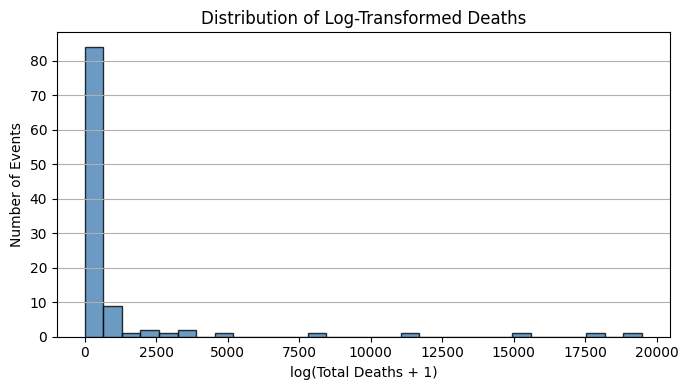

In [3204]:

deaths = df['total_deaths']
plt.figure(figsize=(7,4))
plt.hist(deaths, bins=30, color='steelblue', edgecolor='black', alpha=0.8)
plt.xlabel("log(Total Deaths + 1)")
plt.ylabel("Number of Events")
plt.title("Distribution of Log-Transformed Deaths")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


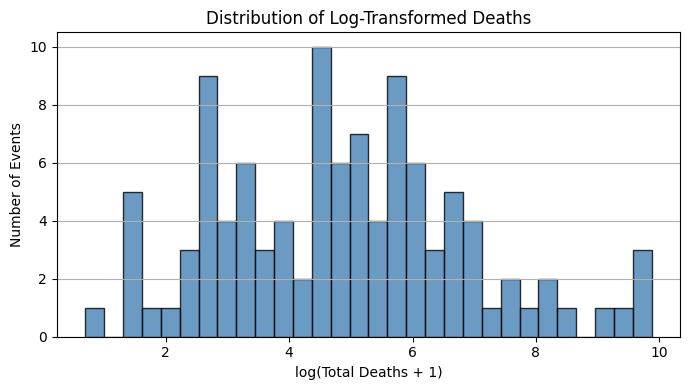

In [3205]:
deaths = df['total_deaths']
log_deaths = np.log1p(deaths)
plt.figure(figsize=(7,4))
plt.hist(log_deaths, bins=30, color='steelblue', edgecolor='black', alpha=0.8)
plt.xlabel("log(Total Deaths + 1)")
plt.ylabel("Number of Events")
plt.title("Distribution of Log-Transformed Deaths")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [3206]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame and already has one-hot encoded columns for region
region_cols = [col for col in df.columns if col.startswith('region_')]

# Create temperature-region and duration-region interaction features
for reg in region_cols:
    df[f'temperature_{reg}'] = df['temperature'] * df[reg]
    df[f'duration_days_{reg}'] = df['duration_days'] * df[reg]
    df[f'delta_temp_C_{reg}'] = df['delta_temp_C'] * df[reg]  # Optional

len(region_cols)

6

In [3207]:
# Choose base features
base_features = [
    'temperature', 'duration_days', 'latitude', 'longitude', 'delta_temp_C', 'delta_temp_std'
]
# Add one-hot region features and new interaction features
interaction_features = [col for col in df.columns if (
    col.startswith('region_') or
    col.startswith('temperature_region_') or
    col.startswith('duration_days_region_') or
    col.startswith('delta_temp_C_region_') or
    col == 'temperature_anomaly'
)]
features = base_features + interaction_features

In [3208]:
# Only keep extreme heat/cold events as defined
extreme = df[
    ((df['event_type_cold'] == 1) & (df['delta_temp_std'] <= -2.5) & (df['duration_days'] >= 5)) |
    ((df['event_type_heat'] == 1) & (df['delta_temp_std'] >= 2.5) & (df['duration_days'] >= 5))
].copy()
extreme.shape

(83, 95)

In [3209]:

X = extreme.drop(columns=['total_deaths','location'])

# Target variable
y = np.log1p(extreme['total_deaths'])  # or just extreme['total_deaths'] if you don't want log

print(X.shape)
print(y.shape)



(83, 93)
(83,)


In [3210]:

y = np.log1p(y)
y.head()

0   1.794635
1   1.887391
2   1.887391
3   1.921170
5   1.689882
Name: total_deaths, dtype: float64

In [3211]:
# "Known" events (with deaths reported)
#known = extreme[extreme['total_deaths'] > 0]
#X_known = known[features]
#y_known = known['total_deaths']

# "Suspected" (zero or missing deaths)
#suspected = extreme[extreme['total_deaths'] == 0]
#X_suspected = suspected[features]

In [3212]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2025, test_size=0.2)


In [3213]:
X_train.shape

(66, 93)

In [3214]:
X_test.shape

(17, 93)

In [3215]:
X_train.info()
X_train['start_date'] = pd.to_datetime(X_train['start_date'])
X_train['end_date'] = pd.to_datetime(X_train['end_date'])
X_test['start_date'] = pd.to_datetime(X_test['start_date'])
X_test['end_date'] = pd.to_datetime(X_test['end_date'])

# Create days since epoch (integer)
X_train['start_date_int'] = (X_train['start_date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')
X_train['end_date_int'] = (X_train['end_date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')
X_test['start_date_int'] = (X_test['start_date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')
X_test['end_date_int'] = (X_test['end_date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

# Drop original object columns
X_train = X_train.drop(columns=['start_date', 'end_date'])
X_test = X_test.drop(columns=['start_date', 'end_date'])

print("X_train = ",X_train.shape)
print("X_test:",X_test.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 93 to 84
Data columns (total 93 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   temperature                                                   66 non-null     float64
 1   start_year                                                    66 non-null     int64  
 2   start_month                                                   66 non-null     int64  
 3   start_date                                                    66 non-null     object 
 4   end_date                                                      66 non-null     object 
 5   duration_days                                                 66 non-null     int64  
 6   duration                                                      66 non-null     int64  
 7   latitude                                                      63 non-null    

In [3216]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 93 to 84
Data columns (total 93 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   temperature                                                   66 non-null     float64
 1   start_year                                                    66 non-null     int64  
 2   start_month                                                   66 non-null     int64  
 3   duration_days                                                 66 non-null     int64  
 4   duration                                                      66 non-null     int64  
 5   latitude                                                      63 non-null     float64
 6   longitude                                                     63 non-null     float64
 7   delta_temp_C                                                  66 non-null    

In [3217]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 83 to 55
Data columns (total 93 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   temperature                                                   17 non-null     float64
 1   start_year                                                    17 non-null     int64  
 2   start_month                                                   17 non-null     int64  
 3   duration_days                                                 17 non-null     int64  
 4   duration                                                      17 non-null     int64  
 5   latitude                                                      17 non-null     float64
 6   longitude                                                     17 non-null     float64
 7   delta_temp_C                                                  17 non-null    

In [3218]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

# Build pipeline: Impute → SelectKBest → RF
pipe = Pipeline([
    ('impute', SimpleImputer(strategy='mean')),
    ('select', SelectKBest(score_func=f_regression)),
    ('rf', RandomForestRegressor(random_state=42)),
    
])

# Parameter grid for KBest
param_grid = {
    'select__k': [10, 30,34,35,36,40,50, X_train.shape[1]],  # try several K
    'rf__n_estimators': [100, 200] ,
     'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5, 10] # Optional: also tune RF if desired
}

# Grid search (use X_train, y_train, can also add cv, scoring etc.)
grid = GridSearchCV(pipe, param_grid, scoring='r2', cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best k:", grid.best_params_['select__k'])
print("Best score:", grid.best_score_)

Best k: 35
Best score: 0.2038571229718533


In [3219]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
# Fill NaNs in both train and test (use median or mean)
X_train_imputed = X_train.fillna(X_train.median())
X_test_imputed = X_test.fillna(X_train.median())  # Use training median for both!


selector = SelectKBest(score_func=f_regression, k=35)
X_train = selector.fit_transform(X_train_imputed, y_train)
X_test= selector.transform(X_test_imputed)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
print("Train R²:", rf.score(X_train, y_train))
print("Test R²:", rf.score(X_test, y_test))
print("X_train.shape:",X_train.shape)

Train R²: 0.8739242706105625
Test R²: 0.6138002040374866
X_train.shape: (66, 35)


In [ ]:
# 1. Get the mask or indices of selected features
selected_indices = selector.get_support(indices=True)
selected_feature_names = X_train_imputed.columns[selected_indices]

# 2.feature importances from RandomForestRegressor
importances = rf.feature_importances_

# 3. Combine into a DataFrame
import pandas as pd

feature_importances = pd.DataFrame({
    'feature': selected_feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importances)

                                              feature  importance
6                                 temperature_anomaly    0.119002
5                                      delta_temp_std    0.104562
30                          temperature_region_Europe    0.099277
4                                        delta_temp_C    0.094541
3                                            duration    0.070344
24                     duration_days_region_temp_mean    0.065604
11                                   country_Slovakia    0.053670
25                      delta_temp_C_region_temp_mean    0.051539
2                                       duration_days    0.044453
7                                    country_Bulgaria    0.043553
33                                     start_date_int    0.032664
32                         delta_temp_C_region_Europe    0.032002
34                                       end_date_int    0.027936
31                        duration_days_region_Europe    0.026852
0         

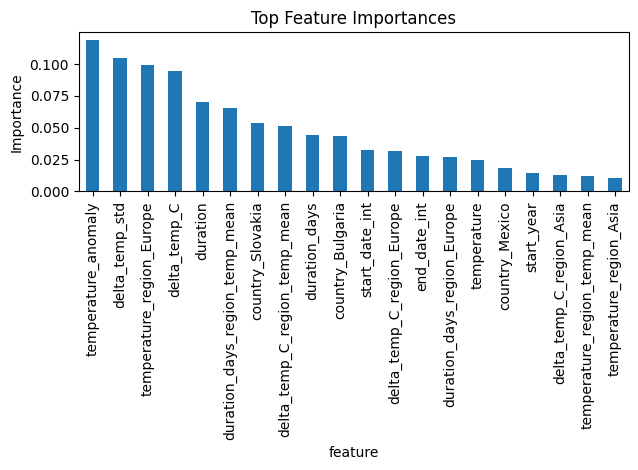

In [3238]:
feature_importances.head(20).plot.bar(x='feature', y='importance', legend=False)
#plt.figure(figsize=(50,20))
#plt.bar(feature_importances['feature'],feature_importances['importance'])
plt.title("Top Feature Importances")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


In [3242]:
from sklearn.ensemble import IsolationForest

# You already have X_train, X_test from SelectKBest above (shape: [n_samples, 35])
iso = IsolationForest(contamination=0.1, random_state=42)
iso.fit(X_train)  # Fit only on train set

# Predict anomaly (-1 = anomaly, 1 = normal)
anomaly_train = iso.predict(X_train)
anomaly_test = iso.predict(X_test)

# Add to your dataframe if needed
X_train_anomaly = pd.DataFrame(X_train, columns=selected_feature_names)
X_train_anomaly['anomaly_flag'] = anomaly_train

X_test_anomaly = pd.DataFrame(X_test, columns=selected_feature_names)
X_test_anomaly['anomaly_flag'] = anomaly_test

print(X_train_anomaly.head())
print(X_test_anomaly.head())




   temperature  start_year  duration_days  duration  delta_temp_C  \
0    42.000000 2022.000000      97.000000 97.000000     25.766981   
1   -20.200000 2011.000000      17.000000 17.000000    -30.734894   
2   -31.000000 2009.000000      14.000000 14.000000    -17.360192   
3   -41.000000 2016.000000       6.000000  6.000000    -34.380976   
4    50.000000 2005.000000      15.000000 15.000000     26.725766   

   delta_temp_std  temperature_anomaly  country_Bulgaria  country_China  \
0       12.145699            25.506557          0.000000       0.000000   
1      -12.101920           -38.205294          0.000000       0.000000   
2       -3.916444           -47.493443          0.000000       0.000000   
3      -13.524725           -59.005294          0.000000       1.000000   
4       11.404444            31.994706          0.000000       0.000000   

   country_France  country_Mexico  country_Slovakia  country_South Africa  \
0        1.000000        0.000000          0.000000      

In [3243]:
print("Number of anomalies in train:", (anomaly_train==-1).sum())

Number of anomalies in train: 7


In [3244]:
print("Number of anomalies in test:", (anomaly_test==-1).sum())

Number of anomalies in test: 1


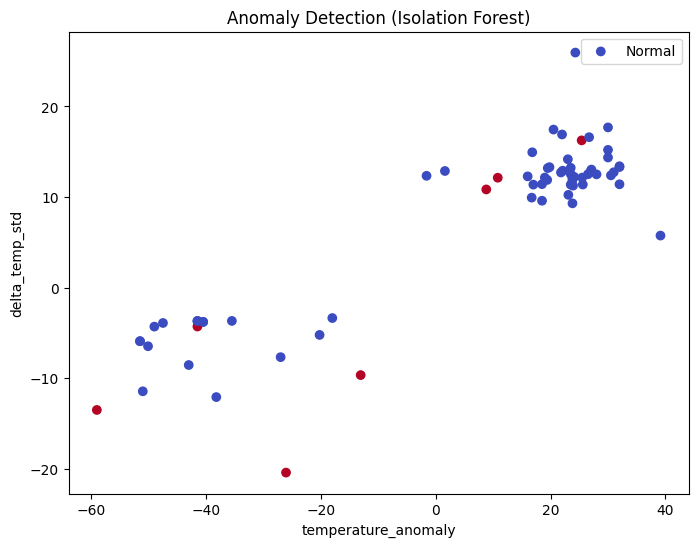

In [3245]:
# Pick the two most important features
feat1 = feature_importances.iloc[0]['feature']
feat2 = feature_importances.iloc[1]['feature']

plt.figure(figsize=(8, 6))
plt.scatter(X_train_anomaly[feat1], X_train_anomaly[feat2], 
            c=(X_train_anomaly['anomaly_flag'] == -1),  # True for anomalies
            cmap='coolwarm', label='Normal')
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.title('Anomaly Detection (Isolation Forest)')
plt.legend(['Normal', 'Anomaly'])
plt.show()


In [3247]:
import pandas as pd

# Assume 'extreme' has all necessary columns
# If you haven't already, add 'anomaly' column from IsolationForest
# extreme['anomaly'] = ... # 1 for anomaly, 0 or -1 for normal

summary = (
    extreme.groupby('country').agg(
        total_events=('total_deaths', 'count'),
        underreported_events=('underreport_flag', 'sum'),
        anomalies=('anomaly', 'sum'),
        predicted_deaths_sum=('rf_pred_deaths', 'sum'),
        reported_deaths_sum=('total_deaths', 'sum'),
    )
    .reset_index()
)

summary['underreport_rate'] = summary['underreported_events'] / summary['total_events']
summary = summary.sort_values('underreport_rate', ascending=False)

# Display
print(summary)


KeyError: 'country'

In [3246]:
# 4. Anomaly Detection
from sklearn.ensemble import IsolationForest
X_filled = X.fillna(X.median())
iso = IsolationForest(contamination=0.1, random_state=42)
extreme['anomaly_score'] = iso.fit_predict(X_filled)
extreme['anomaly'] = extreme['anomaly_score'] == -1


# 5. Country-level summary
extreme['country'] = data.loc[extreme.index, 'country']
summary = extreme.groupby('country').agg(
    total_events = ('total_deaths', 'count'),
    underreported_events = ('underreport_flag', 'sum'),
    anomalies = ('anomaly', 'sum'),
    predicted_deaths_sum = ('rf_pred_deaths', 'sum'),
    reported_deaths_sum = ('total_deaths', 'sum')
)
summary['underreport_rate'] = summary['underreported_events'] / summary['total_events']
summary = summary.sort_values('underreport_rate', ascending=False)
summary

TypeError: Cannot convert [['2001-01-31' '2001-10-10' '2001-10-10' '2003-07-07' '2008-11-01'
  '2008-11-01' '2009-01-01' '2009-12-18' '2009-11-01' '2009-11-01'
  '2010-01-02' '2011-01-01' '2011-02-01' '2011-12-16' '2012-02-02'
  '2012-01-23' '2012-12-01' '2013-03-01' '2013-03-01' '2016-01-20'
  '2016-01-20' '2018-01-01' '2023-01-09' '2002-05-10' '2003-05-10'
  '2003-05-14' '2003-05-01' '2003-08-01' '2003-08-01' '2003-06-21'
  '2005-06-13' '2005-07-27' '2006-07-15' '2006-07-15' '2006-07-15'
  '2006-07-11' '2007-07-15' '2009-04-14' '2009-01-27' '2010-07-19'
  '2011-08-17' '2013-04-01' '2014-01-13' '2014-07-14' '2015-05-20'
  '2015-06-18' '2015-06-29' '2016-01-01' '2016-04-01' '2017-04-12'
  '2018-06-29' '2018-07-01' '2018-06-30' '2019-06-21' '2019-06-24'
  '2019-06-24' '2019-07-19' '2019-07-21' '2019-07-22' '2019-07-29'
  '2019-08-23' '2019-07-21' '2022-06-20' '2022-05-30' '2022-05-30'
  '2022-05-30' '2022-05-30' '2022-05-30' '2022-05-30' '2022-05-30'
  '2022-05-30' '2022-05-30' '2022-05-30' '2022-05-30' '2022-05-30'
  '2022-05-30' '2022-05-30' '2022-05-30' '2022-05-30' '2022-05-30'
  '2022-05-30' '2022-05-30' '2022-05-30']
 ['2001-02-20' '2002-01-20' '2002-01-20' '2003-08-15' '2009-01-08'
  '2009-01-08' '2009-01-15' '2010-01-25' '2010-01-26' '2010-01-26'
  '2010-01-13' '2011-01-18' '2011-02-08' '2011-12-31' '2012-02-07'
  '2012-02-16' '2012-12-15' '2013-03-26' '2013-03-26' '2016-01-26'
  '2016-01-26' '2018-02-07' '2023-01-23' '2002-05-22' '2003-06-12'
  '2003-06-06' '2003-06-06' '2003-08-11' '2003-08-20' '2003-07-21'
  '2005-06-28' '2005-08-01' '2006-08-04' '2006-07-23' '2006-07-23'
  '2006-07-17' '2007-07-22' '2009-06-26' '2009-02-08' '2010-07-25'
  '2011-08-24' '2013-05-30' '2014-01-18' '2014-07-29' '2015-05-31'
  '2015-06-24' '2015-08-09' '2016-01-10' '2016-05-20' '2017-06-15'
  '2018-07-05' '2018-07-15' '2018-07-10' '2019-07-01' '2019-06-30'
  '2019-07-07' '2019-07-27' '2019-07-27' '2019-07-27' '2019-08-08'
  '2019-08-29' '2019-08-28' '2022-07-01' '2022-09-04' '2022-09-04'
  '2022-09-04' '2022-09-04' '2022-09-04' '2022-09-04' '2022-09-04'
  '2022-09-04' '2022-09-04' '2022-09-04' '2022-09-04' '2022-09-04'
  '2022-09-04' '2022-09-04' '2022-09-04' '2022-09-04' '2022-09-30'
  '2022-09-04' '2022-09-04' '2022-09-04']] to numeric